In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Carga de datos y visualización de cada csv

In [2]:
educacion = pd.read_csv('fiuba_1_postulantes_educacion.csv',sep=',', error_bad_lines=False, encoding='ISO-8859-1')
educacion.tail()

,idpostulante,nombre,estado
298226,GNZqARp,Terciario/TÃ©cnico,Abandonado
298227,ow2p8vk,Universitario,Abandonado
298228,6rPEvwv,Universitario,Abandonado
298229,vVja45X,Universitario,Abandonado
298230,1QPMbX3,Universitario,Abandonado


In [4]:
genero_y_edad = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
genero_y_edad.tail()

,idpostulante,fechanacimiento,sexo
200883,1QPMbX3,1988-01-07,MASC
200884,0zPa0eq,1998-05-09,FEM
200885,2zP6Jd0,1997-03-06,FEM
200886,8MPoxDW,1997-07-07,MASC
200887,2zP6J9V,NaN,NO_DECLARA


In [5]:
visitas = pd.read_csv('fiuba_3_vistas.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
visitas.tail()

,idAviso,timestamp,idpostulante
961892,1112366944,2018-02-28T23:59:08.772-0500,MVPj3AK
961893,1001442844,2018-02-28T23:59:37.000-0500,VNrYP6m
961894,1112362644,2018-02-28T23:59:46.181-0500,owzLD43
961895,1112305277,2018-02-28T23:59:52.754-0500,A3DraY1
961896,1112345900,2018-02-28T23:59:55.409-0500,ekmNzBW


In [6]:
postulaciones = pd.read_csv('fiuba_4_postulaciones.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
postulaciones.tail()

,idaviso,idpostulante,fechapostulacion
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06
3401622,1112369825,2zP6J9V,2018-02-28 23:56:10


In [7]:
avisos_online = pd.read_csv('fiuba_5_avisos_online.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
avisos_online.tail()

,idaviso
5023,1112387966
5024,1112383275
5025,1112388199
5026,1112388376
5027,1112387833


In [8]:
avisos_detalle = pd.read_csv('fiuba_6_avisos_detalle.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
avisos_detalle.tail()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13529,1112342505,1,Vendedor de Salon -- UNOMOTOS,<p>UNOMOTOS Concesionaria lÃ­der en el rubro d...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,UNOMOTOS
13530,1112342513,1,OPERADOR DE ENSAYOS NO DESTRUCTIVOS,<p><strong>RECONOCIDA EMPRESA DE MONTAJES INDU...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,IngenierÃ­a Oficina TÃ©cnica / Proyecto,Grupo Consultor
13531,1112342456,1,Back officer Junior de Fondos Comunes de Inver...,"<p>BNP Paribas Investment Partners, importante...",Gran Buenos Aires,NaN,NaN,Full-time,Junior,Contabilidad,BNP PARIBAS ARGENTINA INVESTMENT PARTNERS S A
13532,1112342496,1,Asistente Administrativo,"<p>Somos un joven grupo gastronÃ³mico, que se ...",Gran Buenos Aires,NaN,NaN,Full-time,Gerencia / Alta Gerencia / DirecciÃ³n,AdministraciÃ³n,Cerveteca Odin Srl
13533,1112342432,1,Ingeniero para coordinaciÃ³n de obras de canal...,<p>Importante empresa de servicios para obras ...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,ConstrucciÃ³n,CIMA S.A.


## Merge entre los archivos educación y género y edad de los postulantes

Unimos los datos de ambos data frame con el fin de colocar todos los datos de los postulantes en un mismo data frame

In [9]:
postulantes = pd.merge(educacion, genero_y_edad, on='idpostulante', how='outer')
postulantes.tail()

,idpostulante,nombre,estado,fechanacimiento,sexo
310362,mzdNo99,NaN,NaN,1999-08-10,FEM
310363,Nzr1J34,NaN,NaN,NaN,NO_DECLARA
310364,JBrNMNk,NaN,NaN,1997-01-11,MASC
310365,2zP6Jd0,NaN,NaN,1997-03-06,FEM
310366,2zP6J9V,NaN,NaN,NaN,NO_DECLARA


## Merge entre los archivos avisos_online y avisos_detalle

Unimos ambos datos frame con el fin de colocar los datos de todos los avisos en un mismo data frame

In [10]:
avisos = pd.merge(avisos_online, avisos_detalle, on='idaviso', how='outer')
avisos.tail()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13844,1112342204,1.0,Ejecutivo de Ventas - Prov. de Bs. As e Interi...,"<p>Editorial Rubinzal Culzoni, lÃ­der en el Ã¡...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Rubinzal Editorial
13845,1112341862,1.0,24 Feb - Chief Software Architect ($100K/yr) -...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Tecnologia / Sistemas,CrossOver
13846,1112341899,1.0,24 Feb - Customer Support Manager ($100K/yr) -...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Soporte TÃ©cnico,CrossOver
13847,1112341992,1.0,24 Feb - VP of Customer Support ($200K/yr) - O...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,AtenciÃ³n al Cliente,CrossOver
13848,1112342193,1.0,Supervisor de Mantenimiento,"<p>Nuestro cliente, un importante PYME dedicad...",Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Mantenimiento,VF CONSULTING


## Analizando el set de datos de postulantes

*Analisis de la calidad del set de datos 

In [11]:
postulantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310367 entries, 0 to 310366
Data columns (total 5 columns):
idpostulante       310367 non-null object
nombre             298231 non-null object
estado             298231 non-null object
fechanacimiento    304928 non-null object
sexo               310367 non-null object
dtypes: object(5)
memory usage: 14.2+ MB


In [12]:
postulantes.isnull().any()

idpostulante       False
nombre              True
estado              True
fechanacimiento     True
sexo               False
dtype: bool

* Se agrega las columnas Anio, mes, dia y edad de los postulantes

In [13]:
# Convertimos año, mes y dia de la semana 
import calendar
postulantes['fechanacimiento'] = pd.to_datetime(postulantes['fechanacimiento'], errors='coerce')
postulantes['Anio'] = postulantes['fechanacimiento'].map(lambda x:x.year)
postulantes['Mes'] = postulantes['fechanacimiento'].map(lambda x:x.month)
postulantes['Dia'] = postulantes['fechanacimiento'].map(lambda x:x.weekday_name)

In [14]:
postulantes.dtypes

idpostulante               object
nombre                     object
estado                     object
fechanacimiento    datetime64[ns]
sexo                       object
Anio                      float64
Mes                       float64
Dia                        object
dtype: object

In [15]:
edad = 2018 - postulantes.Anio
edad.tail()

310362    19.0
310363     NaN
310364    21.0
310365    21.0
310366     NaN
Name: Anio, dtype: float64

In [16]:
postulantes['edad']=edad
postulantes.tail()

,idpostulante,nombre,estado,fechanacimiento,sexo,Anio,Mes,Dia,edad
310362,mzdNo99,NaN,NaN,1999-08-10,FEM,1999.0,8.0,Tuesday,19.0
310363,Nzr1J34,NaN,NaN,NaT,NO_DECLARA,NaN,NaN,NaN,NaN
310364,JBrNMNk,NaN,NaN,1997-01-11,MASC,1997.0,1.0,Saturday,21.0
310365,2zP6Jd0,NaN,NaN,1997-03-06,FEM,1997.0,3.0,Thursday,21.0
310366,2zP6J9V,NaN,NaN,NaT,NO_DECLARA,NaN,NaN,NaN,NaN


*Eliminación de la columna nombre de mi archivo postulantes, ya que no lo consideramos relvante para nuestr analisis

In [17]:
postulantes.drop(["nombre"],axis=1,inplace=True)

## Analizando el set de datos de avisos

Se analiza este set de datos puntualmente, ya que queremos filtrar datos que pertenezcan a CABA y GBA.
En particular haremos enfazis en las columnas, idpais, nombre_zona, ciudad y mapacalle 

In [18]:
avisos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13849 entries, 0 to 13848
Data columns (total 11 columns):
idaviso                 13849 non-null int64
idpais                  13534 non-null float64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ MB


## CHIC@S
### 1) considero que no hay que tomar la col ciudad y mapacalle, ya que existe 13802 null y 12977 null, son datos 

In [19]:
avisos.isnull().sum()

idaviso                     0
idpais                    315
titulo                    315
descripcion               315
nombre_zona               315
ciudad                  13802
mapacalle               12977
tipo_de_trabajo           315
nivel_laboral             315
nombre_area               315
denominacion_empresa      320
dtype: int64

## CHIC@S
### 2) Considero en limpiar el dato Bs As (fuera de GBA) 

In [20]:
#Verificamos que las zonas sean solo de Cap Fed y GBA
avisos.nombre_zona.value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

## CHIC@S
### 3) Analizando que datos diferentes a null existe en la col ciudad, se puede ver que hay datos mal cargados, esto tb es otro motivo más (a mi parecer) de no considerar para nuestro analisis esta columna

In [21]:
#Verificamos que las ciudades pertenezcan sólo a CABA y GBA
avisos.ciudad.value_counts()

Buenos Aires                 14
Argentina                    13
CABA                          3
Capital Federal               2
San Isidro                    2
Vicente Lopez                 1
Mendoza                       1
Santa Rosa                    1
La Plata                      1
Tortuguitas                   1
Parque Patricios              1
Barracas                      1
Microcentro                   1
paternal                      1
RepÃºblica Argentina          1
Buenos Aires Province         1
caba                          1
ZÃ¡rate, Campana, Escobar     1
Name: ciudad, dtype: int64

In [22]:
avisos.mapacalle.value_counts()

SARMIENTO 1937                              43
Microcentro                                 30
Buenos Aires                                24
Palermo                                     23
Barracas                                    18
Puerto Madero                               15
Belgrano                                    14
Reconquista 865                             13
retiro                                      12
Parque Patricios                            10
Recoleta                                    10
saavedra                                     8
nuÃ±ez                                       8
Peron 955                                    7
San Telmo                                    6
Monserrat                                    6
25 de Mayo 457 7Âº piso                      6
Mataderos                                    6
Pasaje Aguado 628                            6
calle 7 nÂº1565 e/64 y 65                    5
Av. Libertador 6810 4Âº A                    5
AmenÃ¡bar 107

## Limpieza del set de datos de avisos
Se limpia todos los nans que pueda aparecer en la columna nombre_zona, la justificación es los ptos 1) y 2) que se recalco 

In [23]:
avisos.dropna(subset=['nombre_zona'],inplace=True)

## Filtración de datos por CABA y GBA

In [24]:
avisosGran_Bs_As=avisos.loc[avisos.nombre_zona.str.contains('Gran Buenos Aires'),:]
avisosGBA_Oeste =avisos.loc[avisos.nombre_zona.str.contains('GBA Oeste'),:]

avisosGBA=pd.concat([avisosGBA_Oeste,avisosGran_Bs_As])

In [25]:
avisosCABA=avisos.loc[avisos.nombre_zona.str.contains('Capital Federal'),:]

avisosCABA_GBA=pd.concat([avisosCABA,avisosGBA])

## Eliminación de columnas
Se limpia las columnas por los siguientes motivos:

  * idpais: existe 315 datos nullos y representa menos del 2,5% .Los datos diferentes a nulos, tienen un unico id
   
  * ciudad: existe 13802 datos nulos y aquellos datos diferente a nulos, son datos mal cargados
   
  * mapacalle: existe 12977 datos nulos (representa el 93,7% del total de los datos),no es relevante para nuestro      analisis


In [26]:
avisosCABA_GBA.drop(["idpais", "ciudad", "mapacalle"],axis=1,inplace=True)


## Visualizaciones

###  Hora con mayor y menor cantidad de visitas

* Verificación de la calidad de datos

In [27]:
visitas.dtypes

idAviso          int64
timestamp       object
idpostulante    object
dtype: object

In [28]:
visitas.timestamp.value_counts()

2018-02-28T18:13:14.254-0500    3
2018-02-27T10:14:18.766-0500    3
2018-02-26T12:22:26.834-0500    3
2018-02-24T09:49:12.766-0500    3
2018-02-26T09:52:20.019-0500    3
2018-02-24T15:00:08.930-0500    3
2018-02-26T06:24:30.660-0500    3
2018-02-27T08:58:38.605-0500    2
2018-02-27T10:22:03.537-0500    2
2018-02-23T22:55:13.760-0500    2
2018-02-27T13:50:23.129-0500    2
2018-02-26T10:32:05.115-0500    2
2018-02-27T23:17:48.095-0500    2
2018-02-27T11:30:17.594-0500    2
2018-02-26T07:58:58.151-0500    2
2018-02-27T09:44:14.856-0500    2
2018-02-28T12:15:58.698-0500    2
2018-02-27T09:43:10.262-0500    2
2018-02-28T07:14:37.434-0500    2
2018-02-27T11:04:54.397-0500    2
2018-02-27T09:54:21.412-0500    2
2018-02-28T09:28:32.022-0500    2
2018-02-26T06:36:45.915-0500    2
2018-02-28T19:06:48.274-0500    2
2018-02-27T18:19:24.654-0500    2
2018-02-27T18:44:20.969-0500    2
2018-02-28T08:59:17.645-0500    2
2018-02-25T08:45:36.971-0500    2
2018-02-26T17:05:43.273-0500    2
2018-02-26T14:

In [29]:
visitas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

* Se agregan la columnas dia, mes, año y hora

In [30]:
# Convertimos año, mes, dia de la semana y hora
import calendar
visitas['timestamp'] = pd.to_datetime(visitas['timestamp'])
visitas['Anio'] = visitas['timestamp'].map(lambda x:x.year)
visitas['Mes'] = visitas['timestamp'].map(lambda x:x.month)
visitas['Dia'] = visitas['timestamp'].map(lambda x:x.weekday_name)
visitas['Hora'] = pd.to_datetime(visitas['timestamp'], format='%H:%M',errors='coerce').dt.hour


*Despreciamos el mes de 3, ya que la cantidad de visitas en comparación a Febrero no es comparable

In [31]:
visitas.Mes.value_counts()

2    921074
3     40823
Name: Mes, dtype: int64

In [32]:
visitasFebrero= visitas[visitas.Mes==2]

In [33]:
visitasFebrero.tail()

,idAviso,timestamp,idpostulante,Anio,Mes,Dia,Hora
926019,1112352879,2018-02-28 23:59:43.373,vV9BGbE,2018,2,Wednesday,23
926020,1112303807,2018-02-28 23:59:46.717,ZD8QEXE,2018,2,Wednesday,23
926021,1112322670,2018-02-28 23:59:50.148,bOj3ojq,2018,2,Wednesday,23
926022,1112347283,2018-02-28 23:59:53.949,ZDNJzJE,2018,2,Wednesday,23
926023,1112316657,2018-02-28 23:59:59.935,owavZOL,2018,2,Wednesday,23


* Eliminamos las columnas con la que no vamos a trabajar

In [34]:
visitasFebrero.drop(["timestamp"],axis=1,inplace=True)


In [35]:
visitasFebrero.tail()

,idAviso,idpostulante,Anio,Mes,Dia,Hora
926019,1112352879,vV9BGbE,2018,2,Wednesday,23
926020,1112303807,ZD8QEXE,2018,2,Wednesday,23
926021,1112322670,bOj3ojq,2018,2,Wednesday,23
926022,1112347283,ZDNJzJE,2018,2,Wednesday,23
926023,1112316657,owavZOL,2018,2,Wednesday,23


In [36]:
visitasFebrero.isnull().any()

idAviso         False
idpostulante    False
Anio            False
Mes             False
Dia             False
Hora            False
dtype: bool

In [37]:
visitasFebreroPorHora=visitasFebrero

grouped = visitasFebreroPorHora.loc[:,['Hora','idAviso']].groupby('Hora').agg(['count'])
top_visitas = grouped[('idAviso','count')].sort_values(ascending=True)
top_visitas

Hora
8      4445
7      4550
9      5957
6      7487
5     11966
4     17512
10    18679
3     28553
2     31818
1     34463
0     36136
11    36364
12    50213
22    51527
23    51656
21    53928
17    54704
16    56415
18    56568
20    58042
19    59214
13    60972
15    63737
14    66168
Name: (idAviso, count), dtype: int64

In [49]:
visitasFebreroPorHora=visitasFebrero

top_visitas = visitasFebreroPorHora.groupby('Hora').count().loc[:,'idAviso'].plot(linewidth=2,figsize=(10,6));

top_visitas.set_title("Cantidad de visitas según la hora", fontsize=18)
top_visitas.set_ylabel("Cantidad de visitas", fontsize=10)
top_visitas.set_xlabel("something at 55°", fontsize=10)

Text(0.5,0,'something at 55\xc2\xb0')

Error in callback <function post_execute at 0x7fd377a158c0> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x432 with 1 Axes>

### 7) Día de la semana con mayor y menor cantidad de visitas

In [39]:
visitasFebreroPorDia=visitasFebrero

grouped = visitasFebreroPorDia.loc[:,['Dia','idAviso']].groupby('Dia').agg(['count'])
top_visitas = grouped[('idAviso','count')].sort_values(ascending=True)
top_visitas

Dia
Friday        47236
Sunday        90646
Saturday      95930
Wednesday    227160
Monday       227957
Tuesday      232145
Name: (idAviso, count), dtype: int64

Text(0.5,1,'Cantidad de visitas por dia en el mes de Febrero')

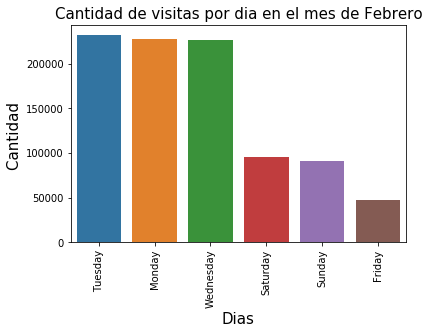

In [40]:
visualizacionVisitasPorDia=visitasFebrero

g = sns.countplot(x='Dia', data=visualizacionVisitasPorDia, order=visualizacionVisitasPorDia['Dia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dias", fontsize=15)
g.set_ylabel("Cantidad ", fontsize=15)
g.set_title("Cantidad de visitas por dia en el mes de Febrero", fontsize=15)

###  Empresas con mayor y menor cantidad de postulaciones

In [41]:
dataframe2= pd.merge(avisos,postulaciones, on='idaviso', how='inner')

In [42]:
empresas=dataframe2[['idaviso','denominacion_empresa']]

In [43]:
empresas.dropna(subset=['denominacion_empresa'],inplace=True)

In [44]:
empresas.isnull().sum()

idaviso                 0
denominacion_empresa    0
dtype: int64

In [45]:
grouped = empresas.loc[:,['denominacion_empresa','idaviso']].groupby('denominacion_empresa').agg(['count'])
top10_empresas = grouped[('idaviso','count')].sort_values(ascending=False)
top10_empresas.head(10)

denominacion_empresa
Manpower                              119013
RANDSTAD                              102640
Grupo GestiÃ³n                         89950
Adecco -RegiÃ³n Office                 83530
Assistem                               68125
Farmacity                              57583
BAYTON                                 55048
BBVA FrancÃ©s                          54805
Pullmen Servicios Empresarios S.A.     51471
Adecco - RegiÃ³n NORTE & OESTE GBA     45912
Name: (idaviso, count), dtype: int64

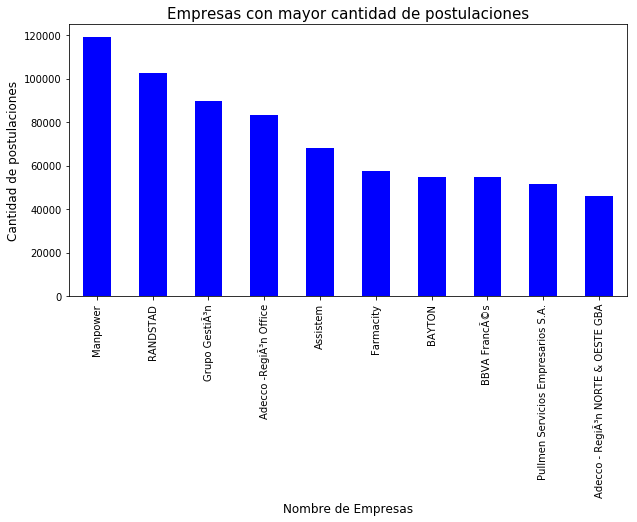

In [46]:
empresas.groupby('denominacion_empresa')['idaviso'].count().sort_values(ascending = False)[0:10].plot(kind='bar',rot = 90,figsize=(10,5),color='blue',fontsize=10)

plt.title('Empresas con mayor cantidad de postulaciones', fontsize=15);
plt.xlabel('Nombre de Empresas', fontsize=12);
plt.ylabel('Cantidad de postulaciones', fontsize=12);